# CSCE 5063 Machine Learning Mini Project 3 Submission
# Manuel Serna-Aguilera

# Mini-project 3 : Piecewise Regression and Resampling Techniques
   
-Dataset Ames Housing Dataset

This mini-project involves:    
- Piecewise Linear and Piecewise Polynomial Regression    
- Resampling Techniques: k-fold cross validation and bootstrapping

Submission: 

For this project, you will submit your .ipynb file through Blackboard. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn

import LRGD

## Task 1: Piecewise Regression

For the Housing Dataset from mini-project2 :   

a. Randomly split the dataset into 80% training set and 20% validation set. (Feel free to write your own function to split data or use scikit learn functions)  
b. Perform:   
i)Multiple Linear Regression,  ii)Polynomial Regression of degree 2, iii)Piecewise Linear Regression (Split/cut K = 5, i.e. 6 bins), and iv) Spline with d = 3 and K = 3. 
          
Report:  
1. Epochs vs Training Error curve for all 4 models in b.    
2. Validation error for all 4 models.  Which one has the best Training and Validation Error?

Note :   

- Make sure you use all 5 input variables from Housing Data and same training and validation set from a) for all models in b.     
- You can still use the LRGD class you created in project 2 or use scikit learn. You just need to create new varaibles using appropriate indicator functions , express it as a additive model and use LRGD or use scikit learn.   
- Refer to general regression equation form for each models ii) to iv) on how to create new variables. 

Food for Thought:   
Q. Why we can still use LRGD we created on Task 1 for Polynomial, Piecewise and Splines? If you think, we cannot use the same Gradient Descent from LRGD, why not?

    



In [2]:
# Import Housing dataset
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv(
    'http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
    sep='\t', 
    usecols=columns
)
df.head() 

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [3]:
# Preprocess dataset
df = df.dropna(axis=0) # drop rows with incomplete data entries

# Convert categorical var CentralAir to dummy values
df['Central Air'] = pd.factorize(df['Central Air'])[0]
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,0,1656,215000
1,5,6,882.0,0,896,105000
2,6,6,1329.0,0,1329,172000
3,7,5,2110.0,0,2110,244000
4,5,5,928.0,0,1629,189900


In [4]:
# Get data from pandas dataframe
names = ['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air', 'Gr Liv Area']
X = df[names].values
y = df['SalePrice'].values

In [5]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()

In [6]:
# (a) Randomly split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

### i) Multiple Linear Regression

In [7]:
mlr_model = LRGD.LRGD()
mlr_model.fit(x_train, y_train)

### ii) Polynomial Regression of degree 2

In [8]:
# NOTE: interaction variables tossed out
from sklearn.preprocessing import PolynomialFeatures

poly_x = PolynomialFeatures(2)
x_train_poly = poly_x.fit_transform(x_train)

In [9]:
x_train_poly.shape # 1+5+5+2*5

(2343, 21)

In [10]:
poly_model = LRGD.LRGD()
poly_model.fit(x_train_poly, y_train)

### iii) Piecewise Linear Regression (split/cut K = 5, i.e. 6 bins)

In [11]:
K_piecewise = 5 # num cuts for piecewise

Variable "Total Bsmt SF" vs. Sales Price
4.890330539374585
-2.38710427022307


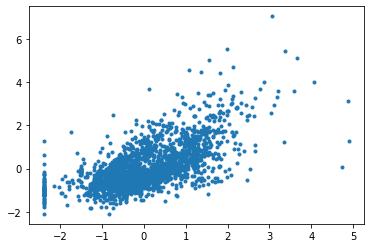

In [12]:
# Get an idea as to which points to cut with respect to 
#  the 'Total Bsmt ST' variable
i = 2
print('Variable "{}" vs. Sales Price'.format(names[i]))
print(np.max(x_train[:, i]))
print(np.min(x_train[:, i]))

plt.scatter(x_train[:, i], y_train, marker='.')

In [13]:
# First, sort data with respect to one predictor, and then make bins
#  at pre-determined intervals
var_id = 2 # predictor we want to make cuts with respect to 
cuts = [-1.5, -1.0, 0.0, 0.5, 1.5, 2.5]

In [14]:
# Get indicies (ids) if input samples that match given conditions
bin1_ids = np.where(x_train[:, var_id] < cuts[0])
bin2_ids = np.where((cuts[0] <= x_train[:, var_id]) & (x_train[:, var_id] < cuts[1]))
bin3_ids = np.where((cuts[1] <= x_train[:, var_id]) & (x_train[:, var_id] < cuts[2]))
bin4_ids = np.where((cuts[2] <= x_train[:, var_id]) & (x_train[:, var_id] < cuts[3]))
bin5_ids = np.where((cuts[3] <= x_train[:, var_id]) & (x_train[:, var_id] < cuts[4]))
bin6_ids = np.where(x_train[:, var_id] >= cuts[4])

In [15]:
# Get each of our training and true values
x1 = x_train[bin1_ids]
y1 = y_train[bin1_ids]

x2 = x_train[bin2_ids]
y2 = y_train[bin2_ids]

x3 = x_train[bin3_ids]
y3 = y_train[bin3_ids]

x4 = x_train[bin4_ids]
y4 = y_train[bin4_ids]

x5 = x_train[bin5_ids]
y5 = y_train[bin5_ids]

x6 = x_train[bin6_ids]
y6 = y_train[bin6_ids]

In [16]:
# Put them in list (I would automate this...but I'm lazy)
bins_train_x = [x1, x2, x3, x4, x5, x6]
bins_train_y = [y1, y2, y3, y4, y5, y6]

min: 0.0008749623710448751
max: 0.49799231212210116


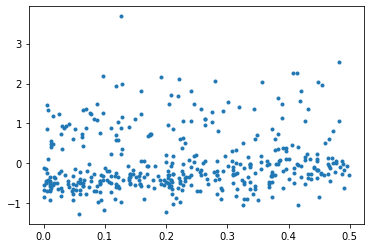

In [17]:
# Showcase a single bin
bin_idx = 3

print('min: {}'.format(np.min(bins_train_x[bin_idx][:,var_id])))
print('max: {}'.format(np.max(bins_train_x[bin_idx][:,var_id])))

plt.scatter(
    bins_train_x[bin_idx][:, var_id], 
    bins_train_y[bin_idx], 
    marker='.'
)

In [18]:
# Now, perform linear regression on each training bin
bin_models = []

for i in range(K_piecewise+1):
    bin_models += [LRGD.LRGD()]
    bin_models[i].fit(
        bins_train_x[i], 
        bins_train_y[i]
    )

In [19]:
for i in range(K_piecewise+1):
    print(bin_models[i].beta)

[ 0.1999856   0.00383286  0.16627156 -0.08675738  0.18853779]
[ 0.19915071  0.0057654   0.24001414 -0.08378994  0.21933513]
[ 0.22896803 -0.00139493  0.09316497 -0.09021234  0.22617917]
[ 0.28373588  0.01280247  0.01460032 -0.03983933  0.32763999]
[ 0.39465765  0.00560565  0.17955411 -0.03928118  0.29435645]
[ 0.65586647 -0.02280351  0.23408994 -0.09491561  0.33074807]


### iv) Spline with d = 3 and K = 3
Create new 'predictors' for intercept, power-1, power-2, power-3, and the K=3 truncated terms for each of the p=5 predictors 1+p(K+d) = 1+5(3+3) = 31 "predictors". We have the power-1 terms and intercept accounted for. We will add the power-2 terms, the power-3 terms and then the truncated terms in the same order as the variables appear in the `names` list.

Recall,

`names = ['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air', 'Gr Liv Area']`

In [20]:
# Add power-2 terms
print(x_train.shape)
spline_x_train = np.hstack((x_train, x_train**2))
print(spline_x_train.shape)

(2343, 5)
(2343, 10)


In [21]:
# Add power-3 terms
spline_x_train = np.hstack((spline_x_train, x_train**3))
print(spline_x_train.shape)

(2343, 15)


In [22]:
# Add truncated terms

# Define 3 cut points for each var (looked at each predictor vs sales price to determine)
cuts = np.array([
    [-2.0, 0.0, 2.0], # overall qual
    [-2.0, 0.0, 2.0], # overall cond
    [-1.0, 0.5, 1.5], # total bsmt sf
    [-1.0, 0.0, 3.0], # central air
    [-1.0, 0.0, 1.0] # gr liv area
])

'''predictor_index=2
cut_index=0
temp = x_train[:,predictor_index]
print('before {}'.format(temp))
temp = np.where(
    temp < cuts[predictor_index][cut_index], 
    temp*0, 
    (temp - cuts[predictor_index][cut_index])**3
)
#temp - cuts[predictor_index][cut_index]
print('after {}'.format(temp))
'''

debug = False

# Iteratively horizontally stack to spline training data
for predictor_index in range(x_train.shape[1]):
    for cut_index in range(cuts.shape[1]):
        temp = x_train[:,predictor_index]
        temp = temp.reshape(temp.shape[0], 1)
        cut = cuts[predictor_index][cut_index]
        
        if debug:
            print(temp.shape)
        
        temp = np.where(
            temp <= cut, # element-wise
            temp*0, # when condition is true
            (temp-cut)**3 # again, element-wise
        )
        
        spline_x_train = np.hstack((spline_x_train, temp))
        
        if debug:
            print(spline_x_train.shape)

In [23]:
# Finally, perform linear regression on dataset with new terms
spline_model = LRGD.LRGD()
spline_model.fit(spline_x_train, y_train)

### (b) i) Epochs vs. Training Error

In [24]:
def plot_error_v_epochs(model=None, name=''):
    print('{} coefficient beta = '.format(name), model.beta)
    print('{} intercept = '.format(name), model.intercept)
    plt.plot(range(1, model.n_iter+1), model.losses)
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.tight_layout()
    plt.title('{}: Training Error vs Epochs'.format(name))
    plt.show()

MLR coefficient beta =  [ 0.3523111  -0.01651009  0.24931836 -0.0784311   0.30242834]
MLR intercept =  [0.00054275]


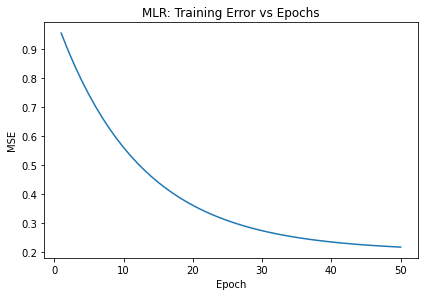

In [25]:
# i) multiple linear regression (MLR)
plot_error_v_epochs(mlr_model, 'MLR')

Polynomial coefficient beta =  [-4.13044374e-02  2.97979778e-01 -2.21030436e-04  2.07881866e-01
  1.52747864e-03  2.51475715e-01  7.88597462e-02 -3.90361659e-02
  6.40047260e-02 -5.67188900e-03  4.95372016e-02 -3.62227789e-02
 -1.85762141e-02  1.58698886e-02  1.34916037e-02  9.63174205e-03
 -6.14503093e-03 -1.32165643e-02 -4.19404623e-02 -1.69639772e-02
  3.39960311e-02]
Polynomial intercept =  [-0.04627158]


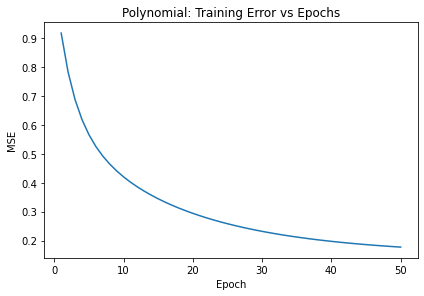

In [26]:
# ii) polynomial linear regression
plot_error_v_epochs(poly_model, 'Polynomial')

Bin 1 coefficient beta =  [ 0.1999856   0.00383286  0.16627156 -0.08675738  0.18853779]
Bin 1 intercept =  [-0.06521573]


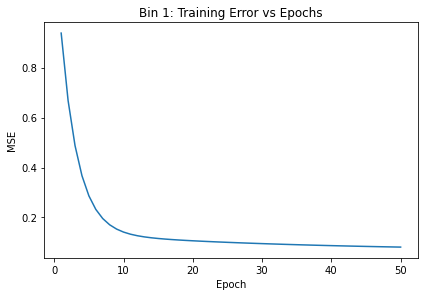

In [27]:
# iii) piecewise linear regression
# Below are the six bins' training error for each epoch (the default parameter)
i = 0
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Bin 2 coefficient beta =  [ 0.19915071  0.0057654   0.24001414 -0.08378994  0.21933513]
Bin 2 intercept =  [-0.19546017]


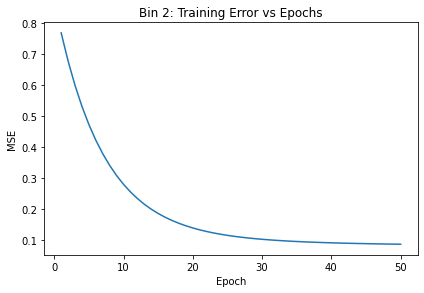

In [28]:
i += 1
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Bin 3 coefficient beta =  [ 0.22896803 -0.00139493  0.09316497 -0.09021234  0.22617917]
Bin 3 intercept =  [-0.15918943]


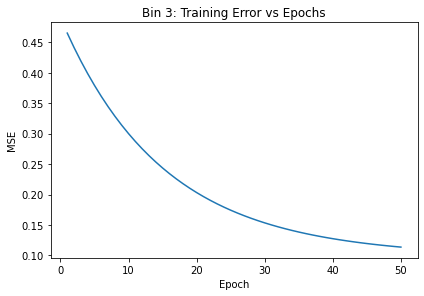

In [29]:
i += 1
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Bin 4 coefficient beta =  [ 0.28373588  0.01280247  0.01460032 -0.03983933  0.32763999]
Bin 4 intercept =  [0.00642071]


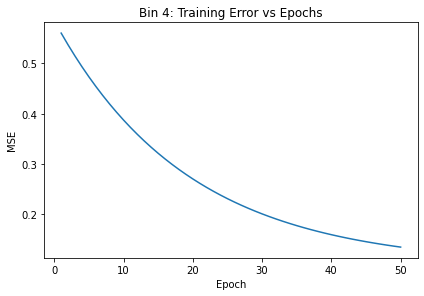

In [30]:
i += 1
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Bin 5 coefficient beta =  [ 0.39465765  0.00560565  0.17955411 -0.03928118  0.29435645]
Bin 5 intercept =  [0.13701147]


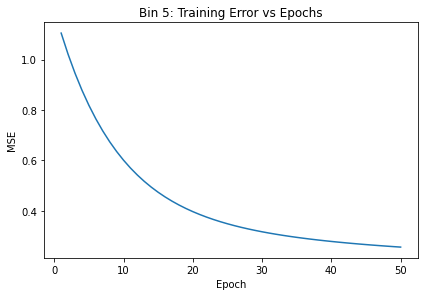

In [31]:
i += 1
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Bin 6 coefficient beta =  [ 0.65586647 -0.02280351  0.23408994 -0.09491561  0.33074807]
Bin 6 intercept =  [0.10882793]


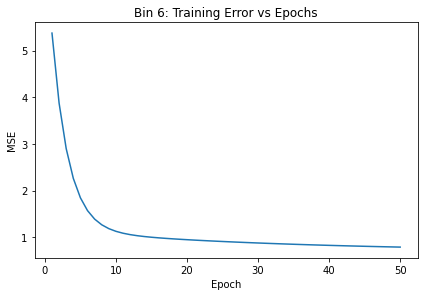

In [32]:
i += 1
plot_error_v_epochs(bin_models[i], 'Bin {}'.format(i+1))

Spline coefficient beta =  [ 7.21248545e+63 -4.67969328e+63  7.05734253e+63 -3.97056753e+64
  3.40278809e+62 -3.62769195e+64 -4.69020163e+64 -3.10021306e+64
 -1.60518167e+65 -3.54608540e+64  2.23399931e+64 -2.49379075e+64
  5.31607863e+63 -5.96118084e+65 -5.22091235e+64 -2.92801619e+65
 -2.40009097e+64 -2.11875177e+62 -5.47938256e+65 -6.73507040e+64
 -1.56910773e+63 -9.46170395e+64 -1.60101561e+64 -4.60405221e+63
 -1.21967394e+66 -5.96337629e+65 -4.53180901e+63 -1.81190727e+65
 -6.91205899e+64 -2.60685190e+64]
Spline intercept =  [-2.28843345e+64]


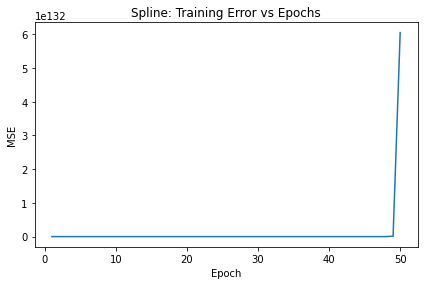

In [33]:
# iv) Spline regression
plot_error_v_epochs(spline_model, 'Spline')

### (b) ii) Report Training and Validation Error

In [34]:
# i) Error for MLR
mlr_model.print_errors(x_test, y_test)

(Avg) Training Error: 0.391344
Validation Error:     0.391640


In [35]:
# ii) Error from Polynomial reg.
x_test_poly = poly_x.fit_transform(x_test)
poly_model.print_errors(x_test_poly, y_test)

(Avg) Training Error: 0.317709
Validation Error:     0.562595


In [36]:
# iii) Piecewise reg.
cuts = [-1.5, -1.0, 0.0, 0.5, 1.5, 2.5] # redefine as we overwrote it

# First, create test set organized into bins
bin1_ids = np.where(x_test[:, var_id] < cuts[0])
bin2_ids = np.where((cuts[0] <= x_test[:, var_id]) & (x_test[:, var_id] < cuts[1]))
bin3_ids = np.where((cuts[1] <= x_test[:, var_id]) & (x_test[:, var_id] < cuts[2]))
bin4_ids = np.where((cuts[2] <= x_test[:, var_id]) & (x_test[:, var_id] < cuts[3]))
bin5_ids = np.where((cuts[3] <= x_test[:, var_id]) & (x_test[:, var_id] < cuts[4]))
bin6_ids = np.where(x_test[:, var_id] >= cuts[4])

bins_test_x = [
    x_train[bin1_ids],
    x_train[bin2_ids],
    x_train[bin3_ids],
    x_train[bin4_ids],
    x_train[bin5_ids],
    x_train[bin6_ids]
]

bins_test_y = [
    y_train[bin1_ids], 
    y_train[bin2_ids], 
    y_train[bin3_ids], 
    y_train[bin4_ids], 
    y_train[bin5_ids], 
    y_train[bin6_ids]
]

In [37]:
# Finally, print errors for all six bins
for i in range(K_piecewise):
    print('Bin {}'.format(i+1))
    bin_models[i].print_errors(bins_test_x[i], bins_test_y[i])

Bin 1
(Avg) Training Error: 0.150776
Validation Error:     0.790610
Bin 2
(Avg) Training Error: 0.192880
Validation Error:     0.364857
Bin 3
(Avg) Training Error: 0.209313
Validation Error:     0.320545
Bin 4
(Avg) Training Error: 0.267424
Validation Error:     0.327788
Bin 5
(Avg) Training Error: 0.439544
Validation Error:     0.152905


In [38]:
# iv) Cubic spline reg
spline_x_test = np.hstack((x_test, x_test**2))
spline_x_test = np.hstack((spline_x_test, x_test**2))

# Re-define our knots...
cuts = np.array([
    [-2.0, 0.0, 2.0], # overall qual
    [-2.0, 0.0, 2.0], # overall cond
    [-1.0, 0.5, 1.5], # total bsmt sf
    [-1.0, 0.0, 3.0], # central air
    [-1.0, 0.0, 1.0] # gr liv area
])

# Iteratively horizontally stack to spline testing data
for predictor_index in range(x_train.shape[1]):
    for cut_index in range(cuts.shape[1]):
        temp = x_test[:,predictor_index]
        temp = temp.reshape(temp.shape[0], 1)
        cut = cuts[predictor_index][cut_index]
        
        temp = np.where(
            temp <= cut, # element-wise
            temp*0, # when condition is true
            (temp-cut)**3 # again, element-wise
        )
        
        spline_x_test = np.hstack((spline_x_test, temp))

In [39]:
# Comment...it seems my cubic spline model is not very good for this task...
spline_model.print_errors(spline_x_test, y_test)

(Avg) Training Error: 121218575341917518831988863101796379491750540387593850890435158972821709400985979379866176094978318127068770341796382649993769517056.000000
Validation Error:     2818696377164105293679684589945259863225236050590042804338420971210959653129155792303007745645284990055444832972506915796094008380358656.000000


### Task 2: Ridge Regression and LASSO

1. For Housing Data, perform Ridge Regression and LASSO for the training data set from Task 1 for different values of lambda.   
    
    Report:    
    1. Values of lambda vs training error curve. 
    2. Values of lambda vs validation error. 
    3. Compare Validarion Error from MLR in Task 1 to Validation Error from Ridge and LASSO. 

    Do not forget to standarize all inputs. For Ridge and Lasso, we have not implemented our own solver. Please use scikit learn library. 
    

### Task 3: Resampling

For the Housing Data: (Complete Data set, not only training from Task 1)

1. Cross Validation: Perform Multiple Linear Regression with K-fold cross validation. You can choose K = 5.    
Report: 
    a. Regression Coeffs for each dataset. 
    b. Cross validation Error. 

2. Bootstrapping: Create 10 different datasets each with 3N/4 data samples using bootstrapping (i.e. Resampling with replacement), where N = total numbers of data samples in Housing Data. Perform Multiple Linear Regression on 10 datasets you created.

Report:   

a. Regression Coeffs for each dataset.  
b. Average error. 

You can write your own resample fucntions but feel free to use scikit learn resample. 



